In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import radon
from skimage.draw import ellipse

In [2]:
# Intensidad. I ∈ [-1; 1]
I = 1

# Inclinación
A = 0

# Semi-eje X. X ∈ (0; 1]
X = 0

# Semi-eje Y. Y ∈ (0; 1]
Y = 0

# Centro X. CX ∈ [-1; 1]
CX = 0

# Centro Y. CY ∈ [-1; 1]
CY = 0

In [3]:
image = imread("test_phantom.png", as_gray=True)

In [4]:
def new_phantom() -> np.ndarray:
   phantom = np.zeros((250, 250))
   return phantom

In [5]:
def add_elipse(
    phantom: np.ndarray,
    I: int,
    A: int,
    X: int,
    Y: int,
    CX: int,
    CY: int
) -> np.ndarray:
    
    rad_A = A/180*np.pi
    
    scaled_X = (X * phantom.shape[1]/2) + phantom.shape[1]/2
    scaled_Y = (Y * phantom.shape[0]/2) + phantom.shape[0]/2

    scaled_CX = (CX * phantom.shape[1])/2
    scaled_CY = (CY * phantom.shape[0])/2
    
    rr, cc = ellipse(r=scaled_Y, c=scaled_X, r_radius=scaled_CY, c_radius=scaled_CX, rotation=rad_A, shape=phantom.shape)
    phantom[rr, cc] = I
    return phantom

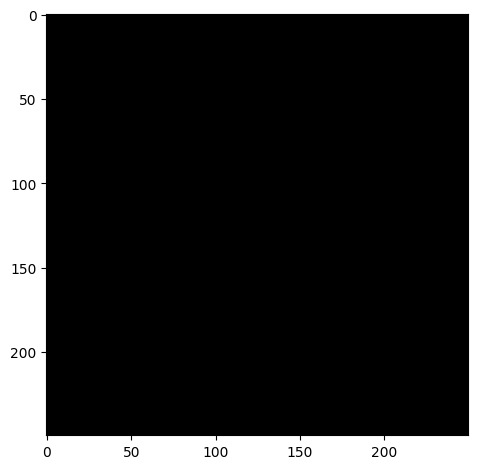

In [6]:
phantom = new_phantom()
imshow(phantom)

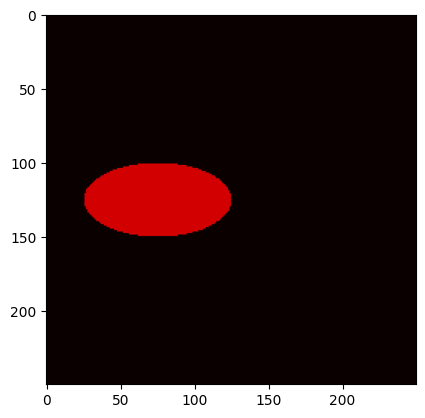

In [14]:
phantom = add_elipse(phantom, .3, 90, -0.4, 0, 0.2, 0.4)
plt.imshow(phantom, cmap=plt.get_cmap("hot"), vmax=1, vmin=0)

In [8]:
def make_sinogram(start: int, step: int, end: int) -> np.ndarray:
    theta = list(range(start, end, step))
    sinogram = radon(image, theta)
    return sinogram

In [9]:
def plot_sinogram(sinogram: np.ndarray) -> None:
    plt.imshow(
        sinogram,
        cmap=plt.cm.get_cmap("hot"),
        aspect='auto',
    )